In [20]:
#load the object index 
import requests
import os
objects = requests.get('https://dev1.soichi.us/api/warehouse/secondary/list/%s'%os.environ['PROJECT_ID']).json()

#dump the content of index and examine
#for obj in objects:
#    print(obj["path"]) #directory path under input directory that this object is stored in 
#    print(obj["datatype"]["name"]) #name of the datatype (neuro/tractprofile, neuro/tractmeasures, etc..)   
#    #contains information about which app and output that this object came from
#    print(obj["app"])
#    print(obj["output"]) #contains metadata, tags, datatype_tags, desc
#    print(obj["finish_date"])

In [21]:
#load participants info
import json
with open("input/participants.json") as f:
    participants = json.load(f)
    #print(participants)

with open("input/participants_column.json") as f:
    participants_column = json.load(f)
    #print(participants_column)


In [24]:
# let's load parc-stats/rois.csv for all subjects.
# while at it, let's group them into gamer v.s non-gamer

import pandas

gamer_rois=[]
nongamer_rois=[]

#iterate over all neruo/parc-stats objects
#TODO - there could be multiple objects per subjects (dedupe?)
for obj in objects:
    if obj["datatype"] == "neuro/parc-stats":
        subject=obj["output"]["meta"]["subject"]
        if os.path.exists("input/"+obj["path"]):
            csv = pandas.read_csv("input/"+obj["path"]+"/rois.csv", index_col="subjectID")

            if subject in participants:
                phenotype = participants[subject]
                if phenotype["group"] == "Gamer":
                    gamer_rois.append(csv)
                else:
                    nongamer_rois.append(csv)
                        
#show a sample..
#print(gamer_rois[0])

#convert to a single panda frame for each group
gamer_rois = pandas.concat(gamer_rois)
nongamer_rois = pandas.concat(nongamer_rois)

print(gamer_rois)

           ROI_name  actual_vol  BrainVol_proportion  centroid_x  centroid_y  \
subjectID                                                                      
15            ROI_2      261184             0.201943  -30.463163   92.311548   
15            ROI_4        6166             0.004767  -16.068804   94.077709   
15            ROI_5         197             0.000152  -36.136332   83.724598   
15            ROI_7       15383             0.011894  -22.989602   46.913682   
15            ROI_8       60581             0.046840  -31.022074   39.150161   
...             ...         ...                  ...         ...         ...   
19         ROI_2031       10177             0.008723   38.568770   75.677152   
19         ROI_2032        1158             0.000993    0.872207  140.637146   
19         ROI_2033        3055             0.002619   16.542093   88.032589   
19         ROI_2034         823             0.000705   29.755577   80.139881   
19         ROI_2035        7586         

In [187]:
#import numpy as np
#compute mean/std for each column
gamer = gamer_rois.groupby(["ROI_name"]).agg([np.mean, np.std])
nongamer = nongamer_rois.groupby(["ROI_name"]).agg([np.mean, np.std])

#pick rois that we want
rois=[
#"ROI_10",
#"ROI_1001",
"ROI_1002",
"ROI_1003",
"ROI_1005",
"ROI_1006",
#"ROI_1007",
"ROI_1008",
"ROI_1009",
"ROI_1010",
"ROI_1011",
"ROI_1012",
"ROI_1013",
"ROI_1014",
"ROI_1015",
#"ROI_1016",
#"ROI_1017",
"ROI_1018",
"ROI_1019",
"ROI_1020",
"ROI_1021",
"ROI_1022",
"ROI_1023",
"ROI_1024",
"ROI_1025",
"ROI_1026",
"ROI_1027",
"ROI_1028",
"ROI_1029",
"ROI_1030",
"ROI_1031",
"ROI_1032",
#"ROI_1033",
"ROI_1034",
"ROI_1035",
"ROI_11",
"ROI_12",
"ROI_13",
"ROI_14",
"ROI_15",
"ROI_16",
"ROI_17",
"ROI_18",
#"ROI_2",
"ROI_2001",
"ROI_2002",
"ROI_2003",
"ROI_2005",
"ROI_2006",
"ROI_2007",
#"ROI_2008",
"ROI_2009",
"ROI_2010",
"ROI_2011",
"ROI_2012",
"ROI_2013",
"ROI_2014",
"ROI_2015",
#"ROI_2016",
"ROI_2017",
"ROI_2018",
"ROI_2019",
"ROI_2020",
"ROI_2021",
"ROI_2022",
"ROI_2023",
"ROI_2024",
"ROI_2025",
"ROI_2026",
#"ROI_2027",
#"ROI_2028",
"ROI_2029",
"ROI_2030",
"ROI_2031",
"ROI_2032",
"ROI_2033",
"ROI_2034",
"ROI_2035",
"ROI_24",
#"ROI_251",
#"ROI_252",
#"ROI_253",
#"ROI_254",
#"ROI_255",
"ROI_26",
"ROI_28",
"ROI_30",
"ROI_31",
#"ROI_4",
#"ROI_41",
"ROI_43",
"ROI_44",
"ROI_46",
#"ROI_47",
"ROI_49",
"ROI_5",
#"ROI_50",
#"ROI_51",
#"ROI_52",
#"ROI_53",
#"ROI_54",
#"ROI_58",
#"ROI_60",
#"ROI_62",
#"ROI_63",
#"ROI_7",
#"ROI_72", #roi 72 is missing from gamer.. but exist on nongamer WHY!?
"ROI_77",
#"ROI_8",
"ROI_85"
]

gamer_sub = gamer[ gamer.index.isin(rois) ]
nongamer_sub = nongamer[ nongamer.index.isin(rois) ]


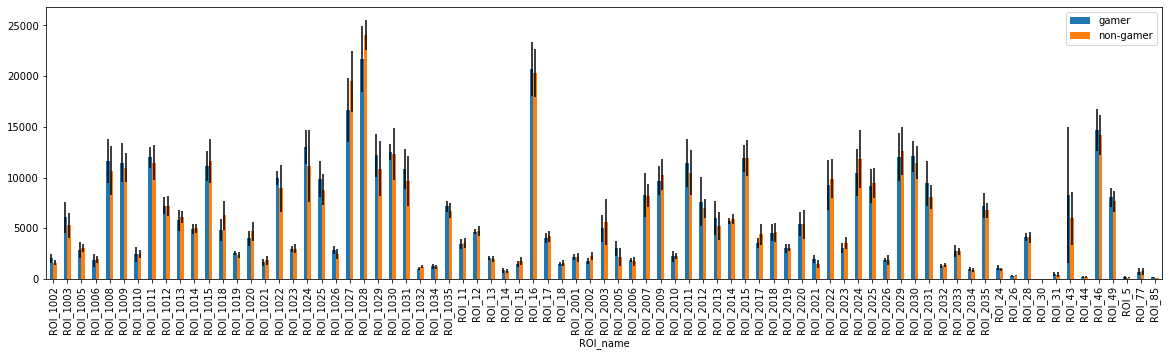

In [189]:
df_mean = pandas.DataFrame({
    "gamer": gamer_sub["actual_vol"]["mean"], 
    "non-gamer": nongamer_sub["actual_vol"]["mean"], 
})
df_std = pandas.DataFrame({
    "gamer": gamer_sub["actual_vol"]["std"], 
    "non-gamer": nongamer_sub["actual_vol"]["std"], 
})
df_mean.plot.bar(figsize=(20,5), yerr=df_std,logy=False)